# LSTM Model and Arima Model local Execution 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# LSTM Model using all states 

In [178]:
# Load the concatenated weather data for all states
data = pd.read_csv('/content/drive/MyDrive/weather_data.csv',index_col='datetime',parse_dates=True)
data = data[['name', 'temp']]
data = data.dropna()
data.head()

,name,temp
datetime,,
1973-01-01,Georgia,10.7
1973-01-02,Georgia,8.9
1973-01-03,Georgia,5.1
1973-01-04,Georgia,7.4
1973-01-05,Georgia,6.1


In [179]:
states = ['Georgia', 'New Hampshire', 'Wisconsin', 'Minnesota',
       'Maryland', 'Pennsylvania', 'Texas', 'Florida', 'Michigan',
       'Hawaii', 'Tennessee', 'Arkansas', 'Ohio', 'Nebraska', 'Montana',
       'Indiana', 'New York', 'South Carolina', 'Mississippi',
       'North Carolina', 'Connecticut', 'Oklahoma', 'West Virginia',
       'Colorado', 'Maine', 'Louisiana', 'Utah', 'North Dakota',
       'Virginia', 'Delaware', 'Kentucky', 'Massachusetts', 'New Jersey',
       'Alabama', 'Arizona', 'California', 'Nevada', 'Alaska',
       'Rhode Island', 'Illinois', 'Idaho', 'Oregon', 'Iowa', 'Vermont',
       'Kansas', 'Washington', 'Missouri', 'New Mexico', 'South Dakota'] 

state_data = {}
train_data = {}
test_data = {}
train_X, train_y = {}, {}
test_X, test_y = {}, {}
scalers = {}
models = {}

for state in states:
    state_data[state] = data.loc[data['name'] == state]['temp'].values.reshape(-1, 1)

    # Pad all state arrays to have the same length as the longest array
    max_length = max([len(state_data[state]) for state in state_data])
    state_temp = state_data[state]
    num_rows_to_add = max_length - len(state_temp)
    state_temp = np.pad(state_temp, ((0,num_rows_to_add), (0,0)), 'constant')
    state_data[state] = state_temp

    if len(state_data[state]) == 0:
        print(f"No data for {state}, skipping")
        continue

    # Scale the data for each state
    scaler = MinMaxScaler()
    state_data[state] = scaler.fit_transform(state_data[state])
    scalers[state] = scaler

    # Define the training and testing data for each state separately
    state_data_padded = state_data[state]
    train_size = int(len(state_data_padded) * 0.8)
    train_data[state] = state_data_padded[:train_size, :]
    test_data[state] = state_data_padded[train_size:, :]

    # Define the training and testing sets for each state separately
    state_train_X, state_train_y = [], []
    state_test_X, state_test_y = [], []

    for i in range(n_steps, len(train_data[state])):
        state_train_X.append(train_data[state][i-n_steps:i, 0])
        state_train_y.append(train_data[state][i, 0])
    for i in range(n_steps, len(test_data[state])):
        state_test_X.append(test_data[state][i-n_steps:i, 0])
        state_test_y.append(test_data[state][i, 0])

    train_X[state] = np.array(state_train_X)
    train_y[state] = np.array(state_train_y)
    test_X[state] = np.array(state_test_X)
    test_y[state] = np.array(state_test_y)

    # Reshape the training and testing sets
    train_X[state] = np.reshape(train_X[state], (train_X[state].shape[0], train_X[state].shape[1], 1))
    test_X[state] = np.reshape(test_X[state], (test_X[state].shape[0], test_X[state].shape[1], 1))

    # Define the LSTM model for each state separately
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(n_steps, 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    models[state] = model

for state in states:
    print(f"Training model for {state}")
    state_data_len = state_data[state].shape[0]
    state_train_X = train_X[state][:n_steps*train_size]
    state_test_X = test_X[state][-n_steps:] 
    state_train_y = train_y[state][:n_steps*train_size]
    state_test_y = test_y[state][-n_steps:]    

    history = models[state].fit(state_train_X, state_train_y, epochs=3, batch_size=32, validation_data=(state_test_X, state_test_y))

Training model for Georgia
Epoch 1/3
459/459 [==============================] - 13s 17ms/step - loss: 0.0167 - val_loss: 0.0084
Epoch 2/3
459/459 [==============================] - 5s 10ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 3/3
459/459 [==============================] - 6s 12ms/step - loss: 0.0061 - val_loss: 0.0010
Training model for New Hampshire
Epoch 1/3
459/459 [==============================] - 14s 17ms/step - loss: 0.0160 - val_loss: 0.0318
Epoch 2/3
459/459 [==============================] - 5s 10ms/step - loss: 0.0072 - val_loss: 0.0269
Epoch 3/3
459/459 [==============================] - 5s 10ms/step - loss: 0.0059 - val_loss: 0.0103
Training model for Wisconsin
Epoch 1/3
459/459 [==============================] - 12s 13ms/step - loss: 0.0146 - val_loss: 0.0532
Epoch 2/3
459/459 [==============================] - 7s 14ms/step - loss: 0.0068 - val_loss: 0.0530
Epoch 3/3
459/459 [==============================] - 5s 10ms/step - loss: 0.0055 - val_loss: 0.0265
Training

459/459 [==============================] - 13s 16ms/step - loss: 0.0145 - val_loss: 0.0234
Epoch 2/3
459/459 [==============================] - 5s 10ms/step - loss: 0.0065 - val_loss: 0.0210
Epoch 3/3
459/459 [==============================] - 6s 14ms/step - loss: 0.0055 - val_loss: 0.0096
Training model for Maryland
Epoch 1/3
458/459 [============================>.] - ETA: 0s - loss: 0.0150

459/459 [==============================] - 13s 16ms/step - loss: 0.0150 - val_loss: 0.0171
Epoch 2/3
459/459 [==============================] - 5s 11ms/step - loss: 0.0059 - val_loss: 0.0178
Epoch 3/3
459/459 [==============================] - 5s 10ms/step - loss: 0.0051 - val_loss: 0.0085
Training model for Pennsylvania
Epoch 1/3
459/459 [==============================] - 13s 13ms/step - loss: 0.0151 - val_loss: 0.0331
Epoch 2/3
459/459 [==============================] - 6s 14ms/step - loss: 0.0063 - val_loss: 0.0307
Epoch 3/3
459/459 [==============================] - 5s 11ms/step - loss: 0.0056 - val_loss: 0.0181
Training model for Texas
Epoch 1/3
459/459 [==============================] - 13s 13ms/step - loss: 0.0198 - val_loss: 0.0045
Epoch 2/3
459/459 [==============================] - 5s 11ms/step - loss: 0.0088 - val_loss: 0.0031
Epoch 3/3
459/459 [==============================] - 6s 13ms/step - loss: 0.0076 - val_loss: 0.0056
Training model for Florida
Epoch 1/3
459/459 [====

In [ ]:
# Initialize lists to store evaluation metrics
mse_scores = []
mae_scores = []
rmse_scores = []
state_names = []
# Loop over all states and evaluate the model for each
for state in states:
    # Evaluate the model on the test data for this state
    y_pred = models[state].predict(test_X[state])
    y_pred = scalers[state].inverse_transform(y_pred)
    y_true = scalers[state].inverse_transform(test_y[state].reshape(-1, 1))
    
    # Calculate the MSE, MAE, and RMSE for this state
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    # Print the evaluation metrics for this state
    print(f"Evaluation metrics for {state}:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    # Add the evaluation metrics for this state to the lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    state_names.append(state)
    
# Create a dataframe of evaluation metrics
df_metrics = pd.DataFrame({
    'State': state_names,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})


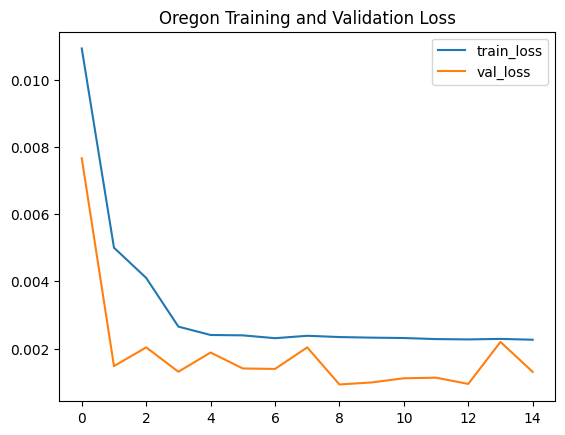

1/1 [==============================] - 3s 3s/step


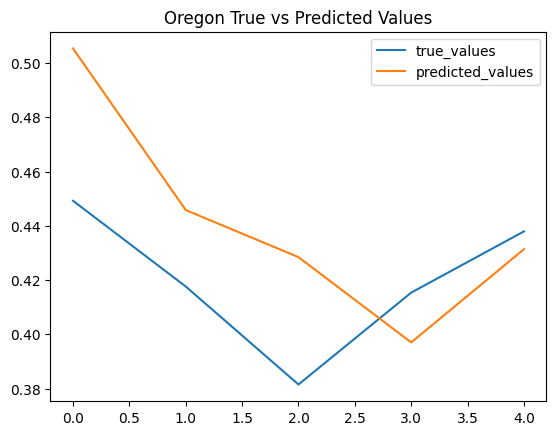

In [143]:
# Plot the training and validation loss for each state
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title(f"{state} Training and Validation Loss")
plt.legend()
plt.show()

# Use the model to make predictions on the test set
test_predictions = models[state].predict(state_test_X)

# Plot the predictions against the true values for each state
plt.plot(state_test_y, label='true_values')
plt.plot(test_predictions, label='predicted_values')
plt.title(f"{state} True vs Predicted Values")
plt.legend()
plt.show()

In [177]:
df_metrics

,State,MSE,MAE,RMSE
0,Georgia,7.400548,1.961338,2.720395
1,New Hampshire,12.522945,2.721619,3.538777
2,Wisconsin,14.730913,2.907173,3.838087
3,Minnesota,11.754932,2.523046,3.428547
4,Maryland,7.800508,2.086985,2.792939
5,Pennsylvania,9.483601,2.326185,3.079546
6,Texas,8.774458,2.060477,2.962171
7,Florida,5.927669,1.704968,2.434680
8,Michigan,10.960383,2.568643,3.310647
9,Hawaii,0.429159,0.485132,0.655102


In [ ]:
# Define the number of future time steps to predict
n_future_steps = 30

# Initialize a list to store the predicted temperature dataframes for each state
future_temps_list = []

# Loop over all states and make predictions for each
for state in states:
    # Use the trained model to make predictions for the next n_future_steps time steps
    state_data_padded = state_data[state]
    last_known_temp = state_data_padded[-n_steps:]
    future_predictions = []
    for i in range(n_future_steps):
        # Reshape the last_known_temp to have shape (1, n_steps, 1)
        temp_input = last_known_temp.reshape(1, n_steps, 1)
        
        # Make the next temperature prediction
        next_temp = models[state].predict(temp_input)
        
        # Append the predicted temperature to the list of future predictions
        future_predictions.append(next_temp[0, 0])
        
        # Update last_known_temp by adding the predicted temperature and removing the oldest temperature
        last_known_temp = np.append(last_known_temp[1:], next_temp[0, 0])
        
    # Invert the scaling of the predicted temperatures
    future_predictions = scalers[state].inverse_transform(np.array(future_predictions).reshape(-1, 1))
    
    # Store the predicted temperatures for the state in a pandas DataFrame
    future_temps_df = pd.DataFrame({'State': state, 
                                    'Time Step': range(1, n_future_steps+1), 
                                    'Temperature': future_predictions[:,0]})
    
    # Add the dataframe to the list of dataframes
    future_temps_list.append(future_temps_df)
    
# Concatenate all the dataframes in the list into one dataframe
future_temps = pd.concat(future_temps_list)

In [176]:
future_temps.head()

,State,Time Step,Temperature
0,Georgia,1,18.753716
1,Georgia,2,18.896301
2,Georgia,3,19.171080
3,Georgia,4,19.716333
4,Georgia,5,20.481842


# ARIMA Model 

In [15]:
# Load the concatenated weather data for all states
data = pd.read_csv('/content/drive/MyDrive/weather_data.csv',index_col='datetime',parse_dates=True)
data = data[['name', 'temp']]
pandasDF = data.dropna()
pandasDF.head()

,name,temp
datetime,,
1973-01-01,Georgia,10.7
1973-01-02,Georgia,8.9
1973-01-03,Georgia,5.1
1973-01-04,Georgia,7.4
1973-01-05,Georgia,6.1


In [16]:
# create an empty DataFrame for storing predictions and evaluation results for all states
all_states_results = pd.DataFrame(columns=['name', 'ARIMA Predictions', 'RMSE', 'MSE'])

# iterate over each state in pandasDF
for state in pandasDF['name'].unique():

    # filter data for the current state
    state_data = pandasDF[pandasDF['name'] == state]

    # Data Train Test Split
    train = state_data.iloc[:-30]
    test = state_data.iloc[-30:]

    # ARIMA Model
    model = ARIMA(train['temp'].astype(float), order=(1, 1, 3))
    model = model.fit()

    # Future Predictions
    index_future_dates = pd.date_range(start='2023-04-15', end='2023-05-15')
    pred = model.predict(start=len(state_data), end=len(state_data)+30, typ='levels').rename('ARIMA Predictions')
    pred.index = index_future_dates
    future_predictions = pd.DataFrame(pred)

    # reset_index
    future_predictions = future_predictions.reset_index()

    # Rename_column 
    future_predictions = future_predictions.rename(columns={'index': 'Date'})

    # add State column
    future_predictions['name'] = state

    # evaluate RMSE and MSE
    rmse = np.sqrt(mean_squared_error(test['temp'].astype(float), future_predictions['ARIMA Predictions'].iloc[-30:]))
    mse = mean_squared_error(test['temp'].astype(float), future_predictions['ARIMA Predictions'].iloc[-30:])

    # add predictions and evaluation results to all_states_results DataFrame
    all_states_results = all_states_results.append({'name': state, 'ARIMA Predictions': future_predictions['ARIMA Predictions'], 'RMSE': rmse, 'MSE': mse}, ignore_index=True)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-16-128c701638eb>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_states_results = all_states_results.append({'name': state, 'ARIMA Predictions': future_predictions['ARIMA Predictions'], 'RMSE': rmse, 'MSE': mse}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/

In [17]:
all_states_results

,name,ARIMA Predictions,RMSE,MSE
0,Georgia,0 11.555208 1 11.555208 2 11.55520...,6.269621,39.308142
1,Wyoming,0 1.415446 1 1.415446 2 1.415446 3...,6.576822,43.254582
2,New Hampshire,0 0.89301 1 0.89301 2 0.89301 3 ...,6.832568,46.683986
3,Wisconsin,0 0.778986 1 0.778986 2 0.778986 3...,9.138982,83.521000
4,Minnesota,0 -0.139259 1 -0.139259 2 -0.139259 3...,9.423073,88.794309
5,Maryland,0 6.024191 1 6.024191 2 6.024191 3...,7.337407,53.837535
6,Pennsylvania,0 4.685881 1 4.685881 2 4.685881 3...,9.214313,84.903565
7,Texas,0 17.859027 1 17.859027 2 17.85902...,4.862492,23.643827
8,Florida,0 17.426537 1 17.426537 2 17.42653...,4.917176,24.178621
9,Michigan,0 0.252437 1 0.252437 2 0.252437 3...,9.448003,89.264761
